In [1]:
pip install nnAudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 356.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install efficientnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 424.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sklearn

  Preparing metadata (setup.py) ... - error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https

In [6]:
import numpy as np # For numerical computations
import pandas as pd # For data manipulation
from matplotlib import pyplot as plt # For data visualization
import seaborn as sns # For data visualization
import tensorflow as tf # For deep learning
import keras # For building neural networks
import keras.layers as L # For building layers in neural networks
import math # For mathematical functions
from keras.utils import Sequence # For creating custom data generators
from keras.preprocessing import image # For image data preprocessing
from random import shuffle # For shuffling data
from sklearn.model_selection import train_test_split # For splitting data into train and validation sets
import torch # For deep learning
from nnAudio.Spectrogram import CQT1992v2 # For creating Constant-Q Transform spectrograms
import efficientnet.keras as efn # For using pre-trained EfficientNet models in Keras

newfigparams = {
                "figure.figsize": (10,4),
                "figure.dpi": 150,
                "axes.titlesize": 20,
                "axes.labelsize": 11,
                "ytick.labelsize": 11,
                "xtick.labelsize": 11,
                "legend.fontsize": 12,
                "legend.frameon": True,
                "lines.linewidth": 1,
                "axes.grid" : False
                }
plt.rcParams.update(newfigparams)
plt.style.use("dark_background")

/opt/conda/lib/python3.7/site-packages/nnAudio/Spectrogram.py:7: Warning: importing Spectrogram subpackage will be deprecated soon. You should import the feature extractor from the feature subpackage. See actual documentation.
  category=Warning,


In [7]:
from IPython.display import HTML # A utility library for displaying HTML and videos in Jupyter notebooks.
import matplotlib.mlab as mlab # A module containing many of the functions that were originally in the MATLAB® application, providing a high-level interface for manipulating and plotting data in Python.
from scipy import signal # A package that contains a variety of functions and algorithms for signal processing.
from scipy.interpolate import interp1d # A function that allows one-dimensional interpolation on a set of data.
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz # A module that provides various functions for designing and analyzing digital filters. 

In [8]:
train_labels = pd.read_csv("../input/g2net-trainlabelpaths/training_labels_with_paths.csv")
train_labels.target.value_counts()
example = 1

example_strain = np.load(train_labels[train_labels.target==1].iloc[example].filepath)
example_strain_0= np.load(train_labels[train_labels.target==0].iloc[example].filepath)
path = list(train_labels['id'])
for i in range(len(path)):
    path[i] = '../input/g2net-gravitational-wave-detection/train/' +path[i][0]+'/'+path[i][1]+'/'+path[i][2]+'/' + path[i] + '.npy'

1. The first line of code reads in a CSV file called "training_labels_with_paths.csv" which is located in a folder called "g2net-trainlabelpaths" that is located in the "input" folder. It assigns the resulting pandas DataFrame object to a variable called train_labels. The CSV file contains information about the training data, including the path to the files and their corresponding target values.

2. The second line of code uses the value_counts() method of the target column in the train_labels DataFrame to count the number of occurrences of each target value in the dataset.

3. The third line of code sets the value of the variable example to 1. This variable will be used later to select a specific example from the dataset.

4. The fourth line of code loads in the strain data for the example-th example with a target value of 1 from the train_labels DataFrame, and assigns it to the variable example_strain. The strain data is stored in a NumPy array in a file located at the path specified in the CSV file.

5. The fifth line of code loads in the strain data for the example-th example with a target value of 0 from the train_labels DataFrame, and assigns it to the variable example_strain_0. The strain data is stored in a NumPy array in a file located at the path specified in the CSV file.

6. The sixth line of code creates a list called path that contains the paths to all of the data files in the training set. It loops through each path in the list and modifies it to include the path to the "train" folder where the data is stored.

In [9]:
def id2path(idx,is_train=True):
    path = '../input/g2net-gravitational-wave-detection'
    if is_train:
        path += '/train/'+idx[0]+'/'+idx[1]+'/'+idx[2]+'/'+idx+'.npy'
    else:
        path += '/test/'+idx[0]+'/'+idx[1]+'/'+idx[2]+'/'+idx+'.npy'
    return path
def increase_dimension(idx,is_train,transform=CQT1992v2(sr=2048, fmin=20, fmax=1024, hop_length=64)): # in order to use efficientnet we need 3 dimension images
    waves = np.load(id2path(idx,is_train))
    waves = np.hstack(waves)
    waves = waves / np.max(waves)
    waves = torch.from_numpy(waves).float()
    image = transform(waves)
    image = np.array(image)
    image = np.transpose(image,(1,2,0))
    return image


CQT kernels created, time used = 0.0735 seconds


/opt/conda/lib/python3.7/site-packages/nnAudio/utils.py:429: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn("If fmax is given, n_bins will be ignored", SyntaxWarning)


This code defines two functions: id2path and increase_dimension.

The id2path function takes an ID (idx) and a boolean flag (is_train) indicating whether the data is from the training set or not. It returns the file path for the corresponding data file in the G2Net gravitational wave detection dataset.

The increase_dimension function takes an ID, a boolean flag, and a transform (which is a function that transforms the input data). This function loads the data from the specified file using the id2path function and applies the specified transform to increase the dimension of the data to 3. The transform used here is the Constant-Q Transform (CQT) provided by the nnAudio library, which transforms the input audio data to an image representation. The output is a numpy array with 3 dimensions.

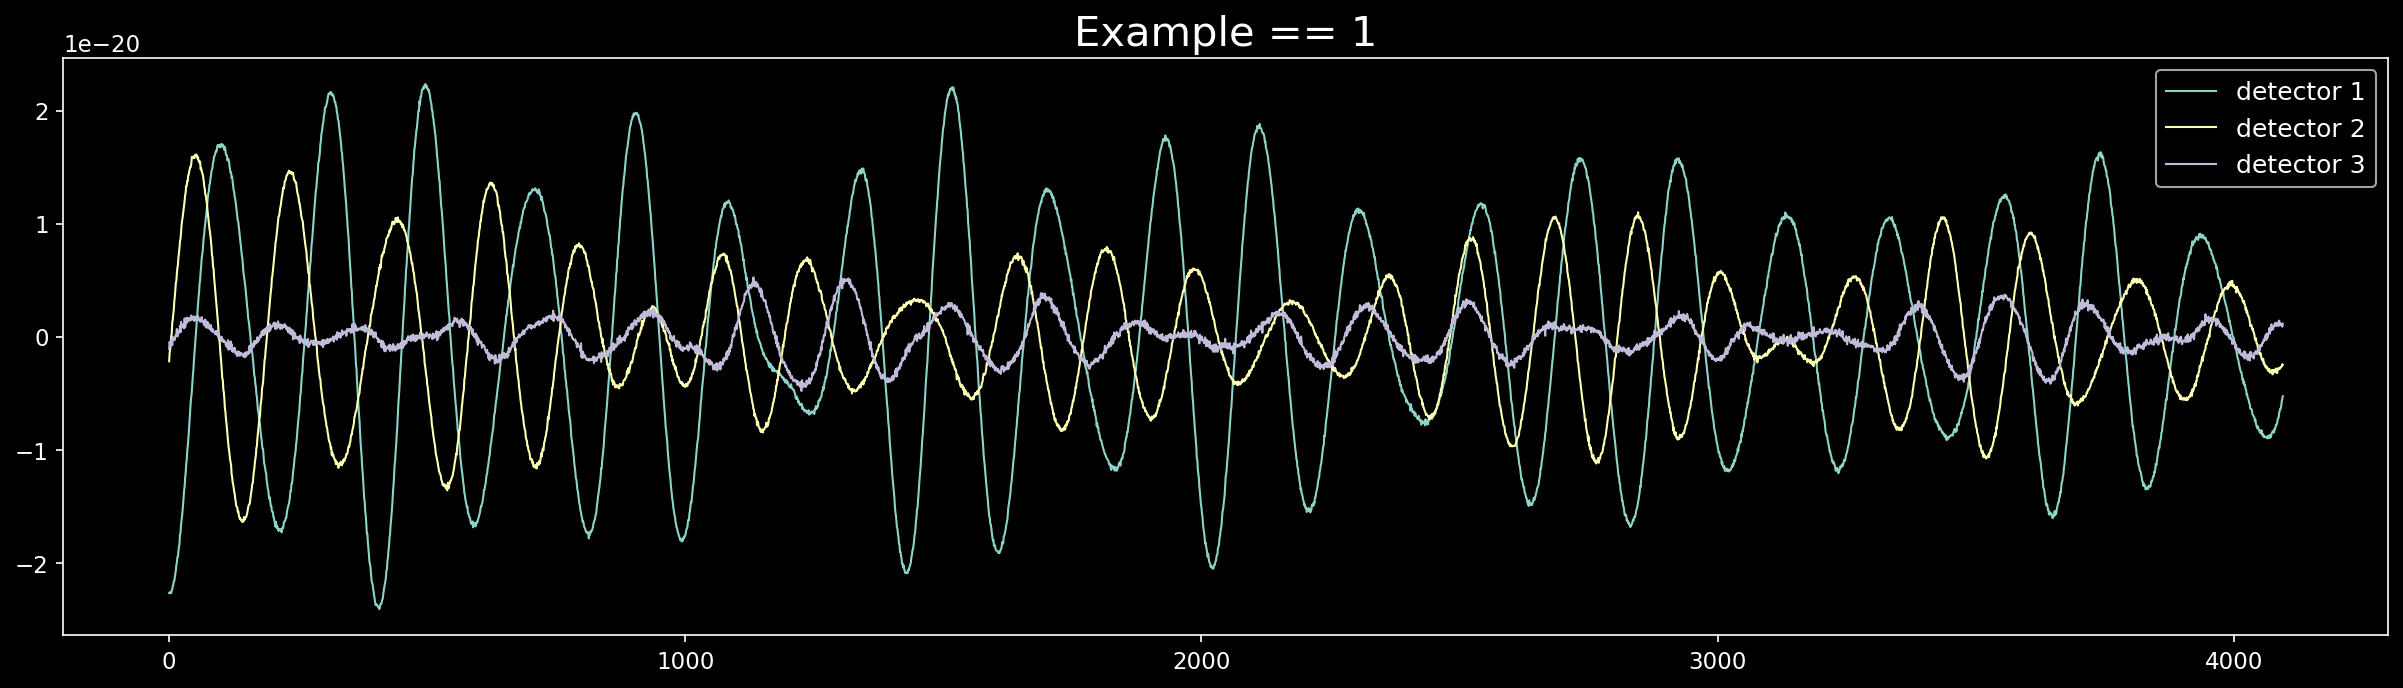

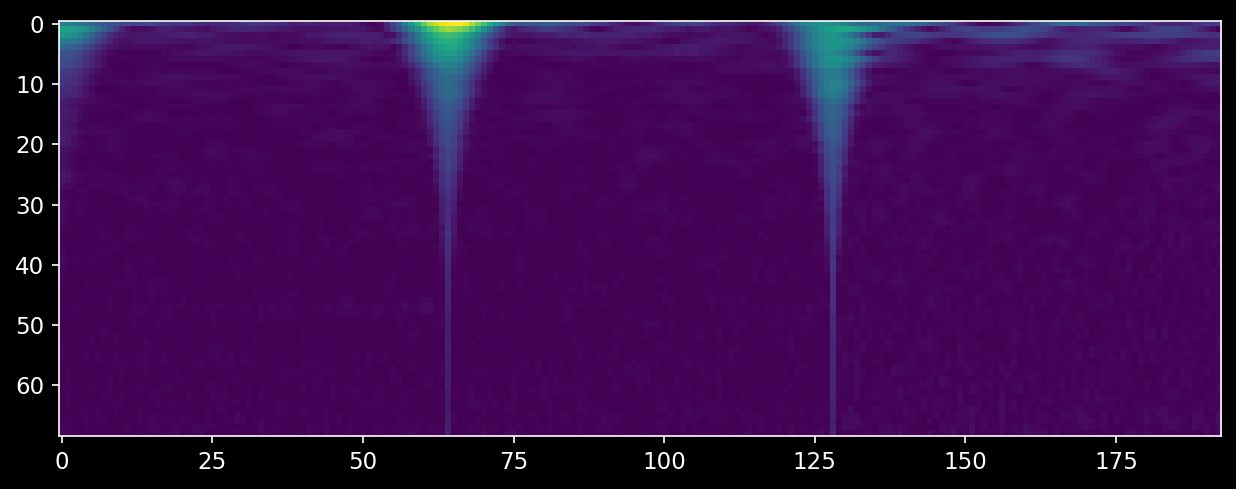

In [10]:
plt.figure(figsize=(20,5))

plt.plot(example_strain[0,:], label="detector 1")
plt.plot(example_strain[1,:], label="detector 2")
plt.plot(example_strain[2,:], label="detector 3")
plt.title("Example == 1");
plt.legend()
plt.show()
plt.imshow(increase_dimension(train_labels['id'][0],is_train=True))
plt.show()

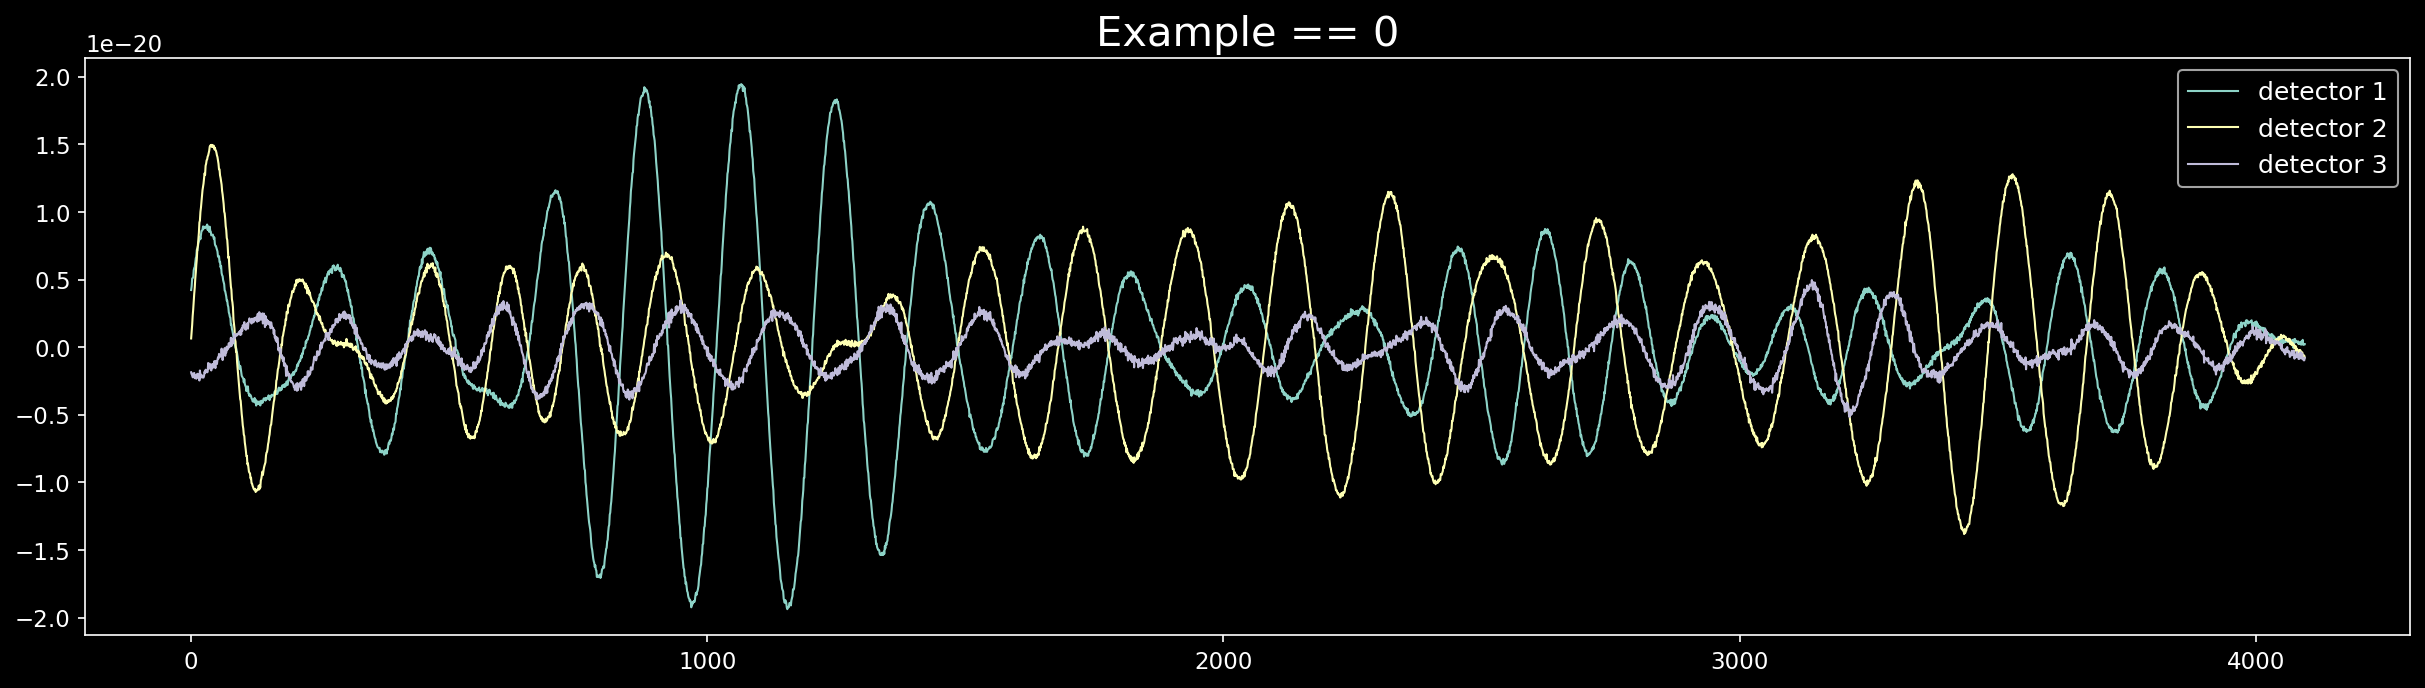

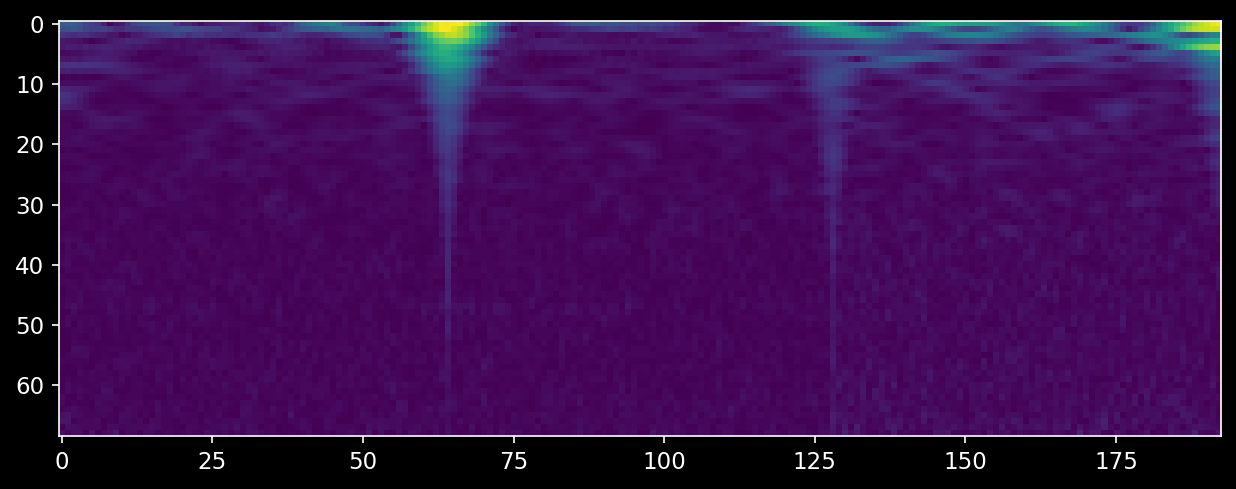

In [11]:
plt.figure(figsize=(20,5))

plt.plot(example_strain_0[0,:], label="detector 1")
plt.plot(example_strain_0[1,:], label="detector 2")
plt.plot(example_strain_0[2,:], label="detector 3")
plt.title("Example == 0");
plt.legend()
plt.show()
plt.imshow(increase_dimension(train_labels['id'][1],is_train=True))
plt.show()

En esta sección se está haciendo un análisis visual de los datos generados por tres detectores (LIGO Hanford, LIGO Livingston y Virgo). Los datos representan el ruido de los detectores y, en el caso de los objetivos calientes, también incluyen una señal simulada de ondas gravitacionales oculta en el ruido. La idea es mostrar gráficamente los datos generados por los tres detectores y hacer una comparación visual. Es importante destacar que el ruido de los detectores es real y no simulado.

Estos datos fueron recogidos utilizando un interferómetro Michelson de gran escala. Este tipo de instrumento es sensible a las ondas gravitacionales, pero también a otras fuerzas y desplazamientos terrestres, incluyendo vibraciones de los propios instrumentos. Estas fuerzas causan la elongación de los brazos del interferómetro, lo que resulta en una interferencia constructiva y las ondas que se pueden ver en los datos. El texto sugiere ver dos videos para entender mejor cómo la elongación de los brazos del interferómetro resulta en interferencia constructiva.

In [12]:
sample_rate = 2048 #Hz (1/seconds)
time_span = 2 #seconds
samples_total = time_span * sample_rate
dt = 1/(samples_total) #4096 points in total
dt

channel = 1 #pick which detector you like to use

In this code, a specific channel is used to perform the fast Fourier transform and calculate the power spectral density of the signal. The sampling rate and total time are set beforehand, and the value of "dt" is calculated as the inverse of the total number of samples. This allows for a clearer understanding of the sampling frequency and duration of the signal.
$$ f(x) = \frac{a_{0}}{2} + \sum_{k=1}^{\infty} \left[ a_{k} \cos \left(\frac{k \pi}{l} x\right) + b_{k} \sin \left(\frac{k \pi}{l} x\right) \right] + R_{n}(x)$$

sample_rate is the frequency at which the gravitational wave detector takes measurements. It is measured in Hertz (Hz), which means "per second". In this case, the sample rate is 2048 Hz.
time_span is the duration of the time window used for each measurement. In this case, the time window is 2 seconds.
samples_total is the total number of samples that will be taken during the time window. It is calculated by multiplying the sample_rate and time_span.
dt is the time between each sample, calculated as the inverse of the samples_total.
channel is the number of the detector that will be used. The code does not specify what the detectors are or how many there are, but it assumes that the detectors are numbered in some way and allows the user to choose which one to use by setting the channel variable to the appropriate number.

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


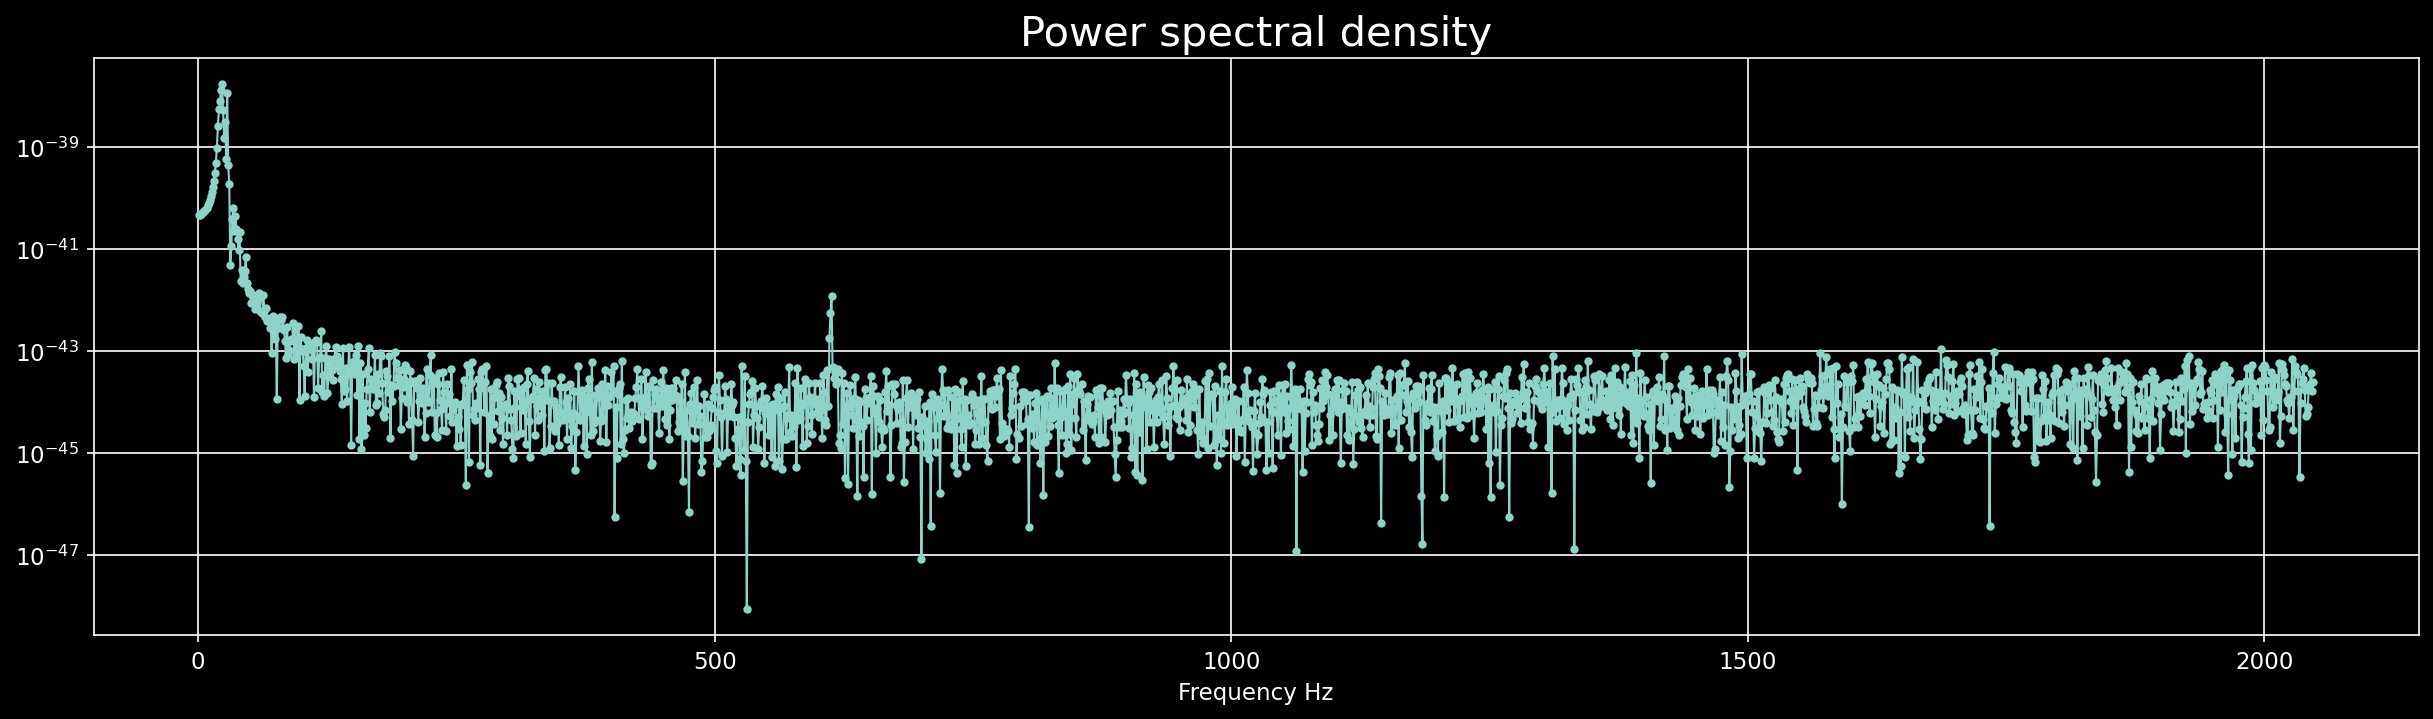

In [13]:

plt.figure(figsize=(20,5))

fhat = np.fft.fft(example_strain[channel,:], samples_total)
PSD = fhat * np.conj(fhat) / samples_total
freq = 1/(dt*samples_total) * np.arange(samples_total)


L = np.arange(1, np.floor(samples_total/2), dtype="int")
plt.plot(freq[L],PSD[L], '.-')
plt.grid("on")
plt.xlabel("Frequency Hz");
plt.title("Power spectral density");
plt.yscale("log")

In this code, the same concept as explained earlier is used to calculate the Power Spectral Density (PSD). The Fast Fourier Transform (FFT) is used to calculate the Fourier transform of the "example_strain" signal data on a specific channel. Then, the Power Spectral Density (PSD) is calculated by multiplying the Fourier transform by its complex conjugate and dividing the result by the total number of samples. A graph is created to visualize the PSD as a function of frequency. The scale is chosen to be logarithmic in order to better visualize the distribution of signal energy across different frequency bands.

The idea behind visualizing the PSD is to see the fluctuations in the PSD for high frequencies, where the hidden signal is likely to be found. On the other hand, low frequencies correspond to "big waves" caused by instrumental vibrations or terrestrial forces, so it is unlikely to find the signal in that region.

Next, some examples of components (or regions in the PSD) are selected to show what type of wave they correspond to. This will allow for comparison with the original data and give an idea of its structure.

The variable "show_side_effects" is set to "True", which means that the side effects of the signal will be shown.

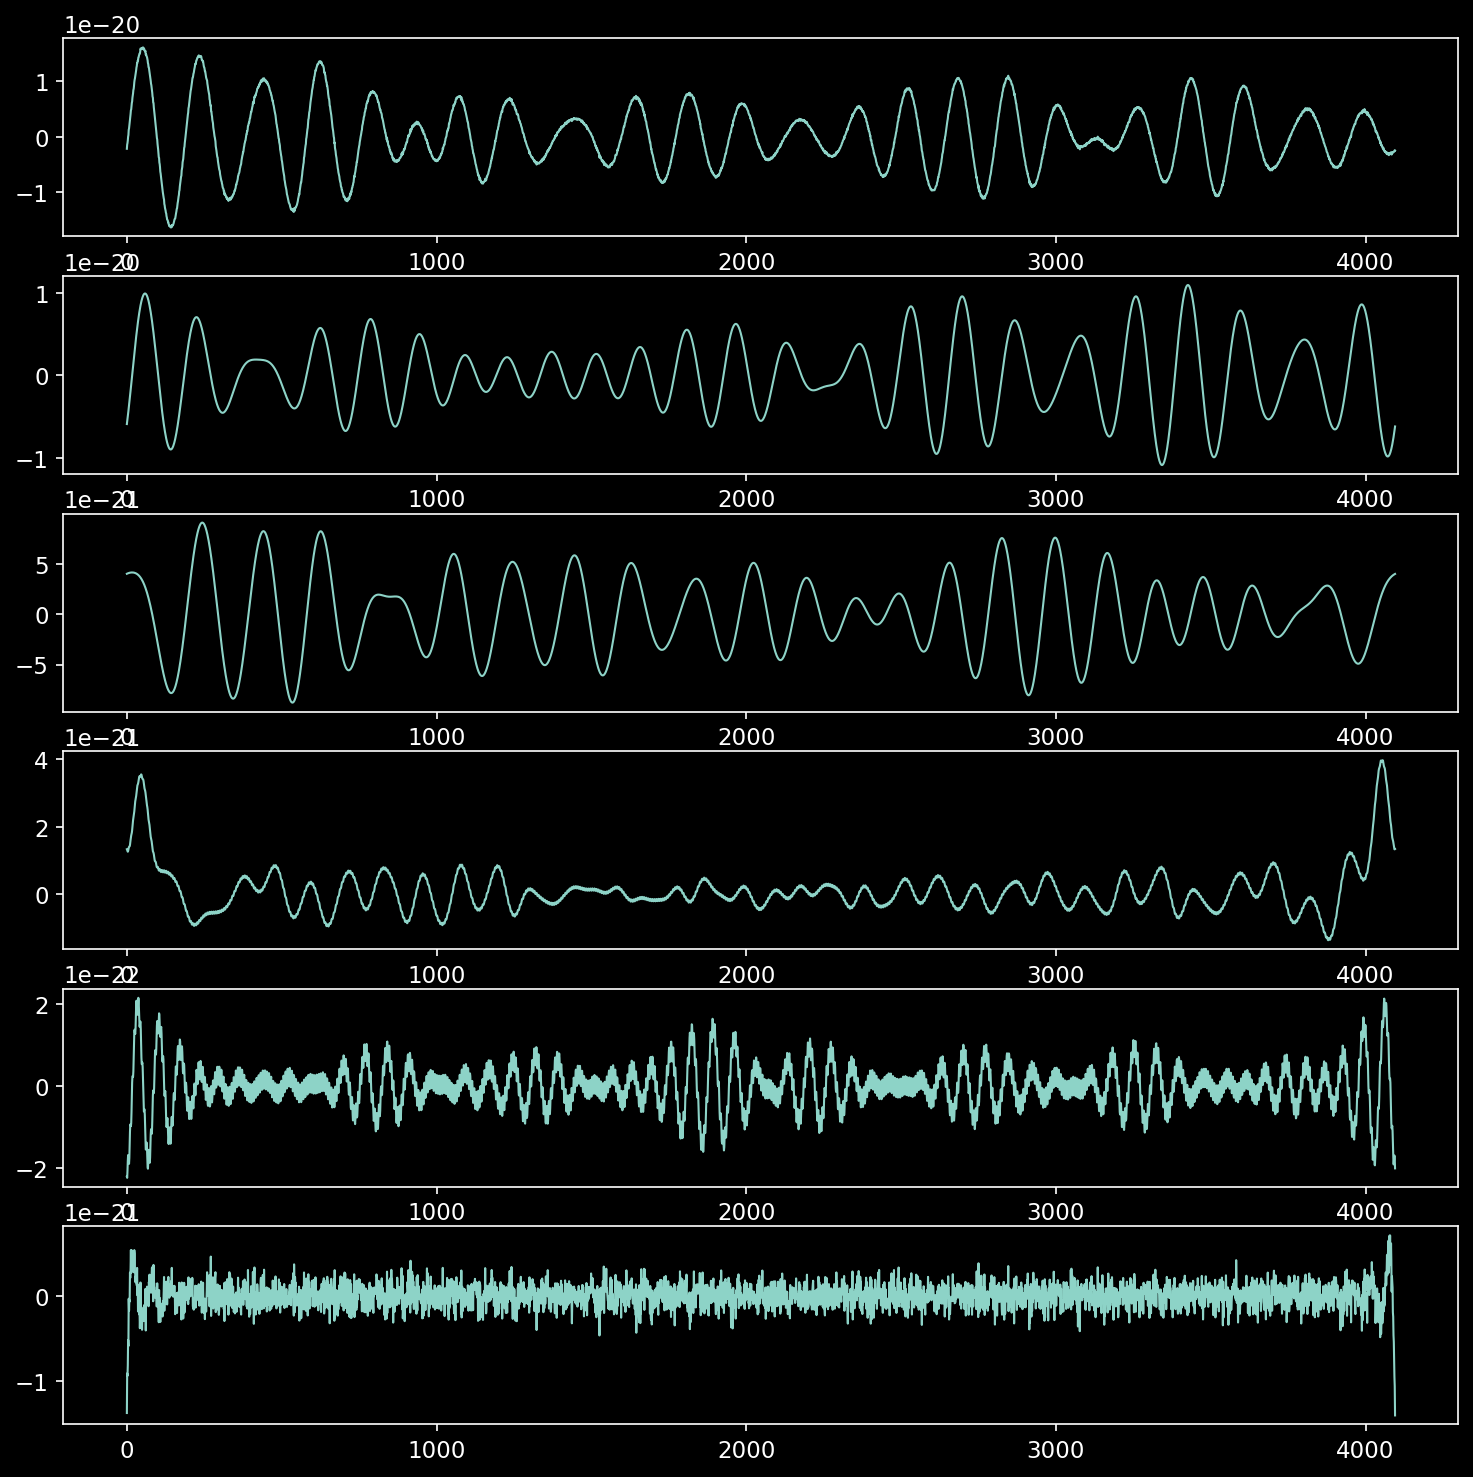

In [14]:
show_side_effects = True
fig, ax = plt.subplots(6,1,figsize=(12,12))

ax[0].plot(example_strain[channel])
ax[1].plot(np.fft.ifft((PSD>1e-38)*fhat))
ax[2].plot(np.fft.ifft(((PSD>1e-40) & (PSD <= 1e-38))*fhat))
ax[3].plot(np.fft.ifft(((PSD>1e-42) & (PSD <= 1e-40))*fhat))
ax[4].plot(np.fft.ifft(((PSD>0.5e-42) & (PSD <= 1e-42))*fhat))
ax[5].plot(np.fft.ifft((PSD<=0.5e-42)*fhat))

if not show_side_effects:
    for n in range(3,6):
        ax[n].set_xlim(20,2000)

This code creates a figure with six subplots. Each subplot represents the signal after applying different filters based on the power spectrum. The original signal is shown in the first subplot. The following subplots show the resulting signal after applying filters with different thresholds in the power spectrum.

The filter is applied by multiplying the Fourier spectrum by a mask that contains zeros and ones, where zeros correspond to the frequency components that should be filtered out and ones correspond to the frequency components that should be retained. The mask is constructed by comparing the power spectrum with different thresholds.

If the variable "show_side_effects" is set to False, then the x-axis limit in subplots 3-6 is set to 20 to 2000. This limits the visualization of the resulting signal after applying the filters.

After applying the inverse Fourier transform, different components of the original data can be filtered out, but it is still difficult to see something like a signal caused by a gravitational wave. Interesting side effects can also be seen at the beginning and end of each wave after applying the inverse Fourier transform.

To suppress this effect called "spectral leakage", it is necessary to apply a window function. The application of a window function is necessary to suppress spectral leakage and improve the accuracy of the transform.

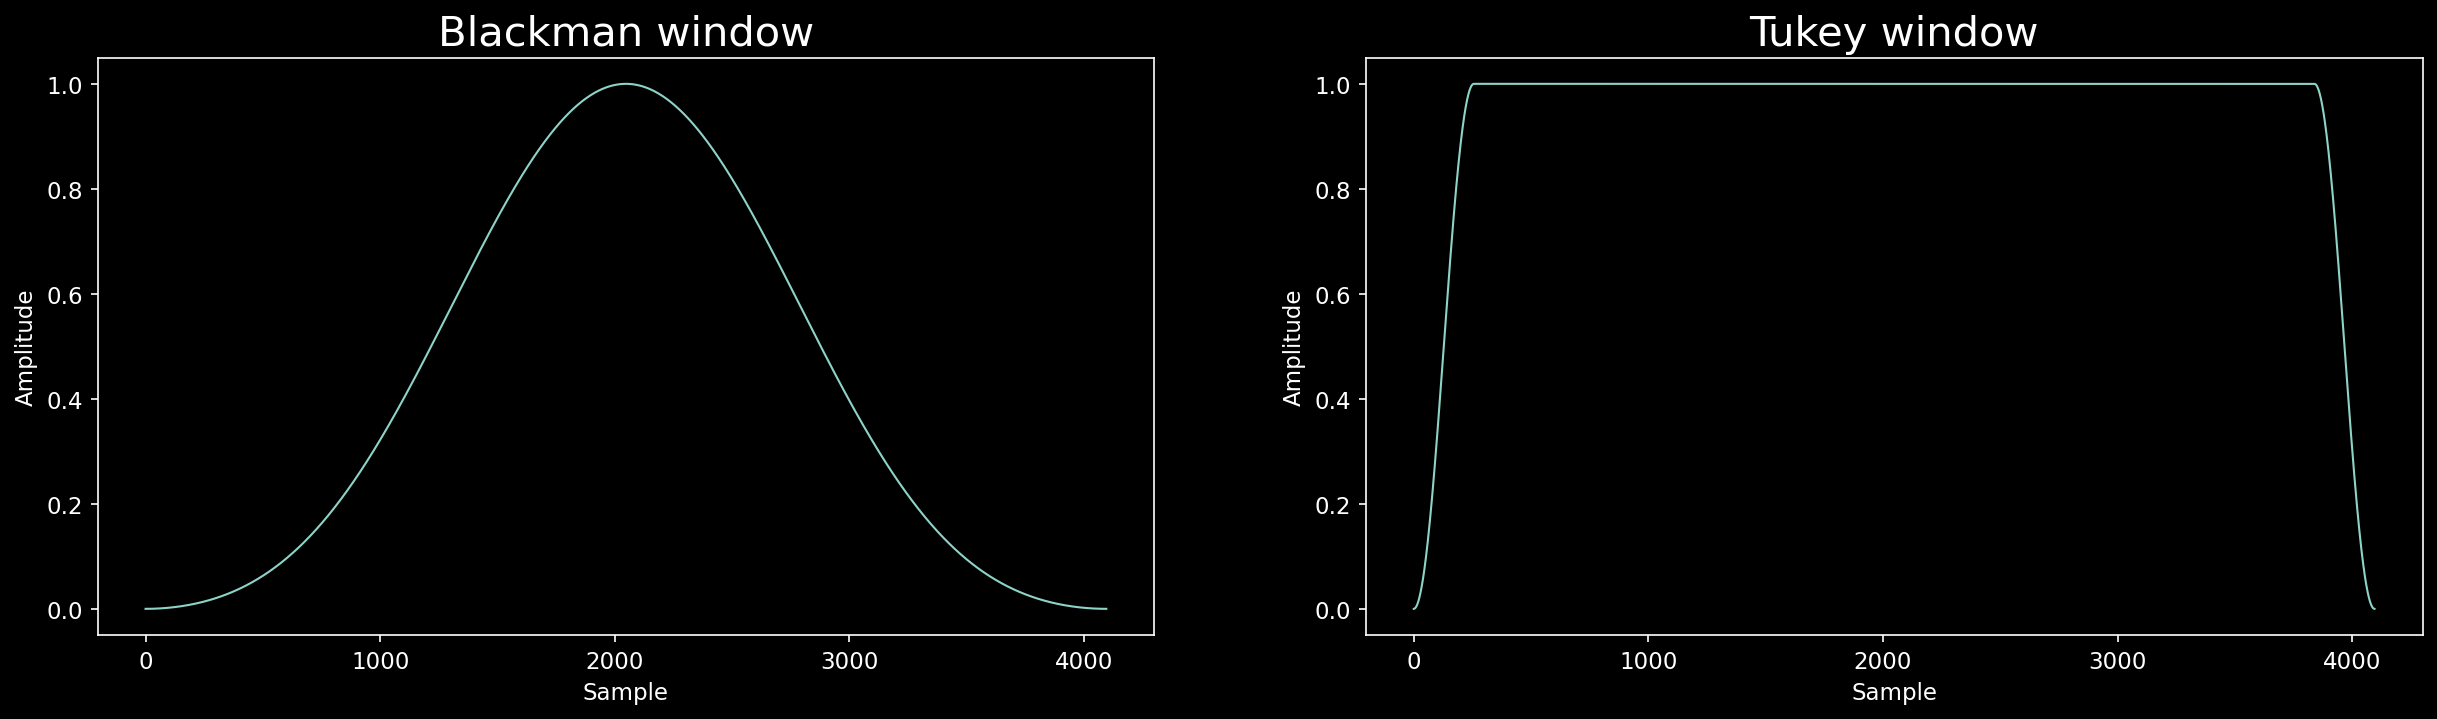

In [15]:
hp_window = 1
hp_tukey_alpha = 0.125
fband = [35.0, 200.0]

blackman_window = signal.blackman(int(samples_total*hp_window)) #signal.tukey(strain, alpha=1./8)
tukey_window = signal.tukey(samples_total*hp_window, hp_tukey_alpha)
fig, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].plot(blackman_window)
ax[0].set_title("Blackman window")

ax[1].plot(tukey_window)
ax[1].set_title("Tukey window")

for n in range(2):
    ax[n].set_ylabel("Amplitude")
    ax[n].set_xlabel("Sample")

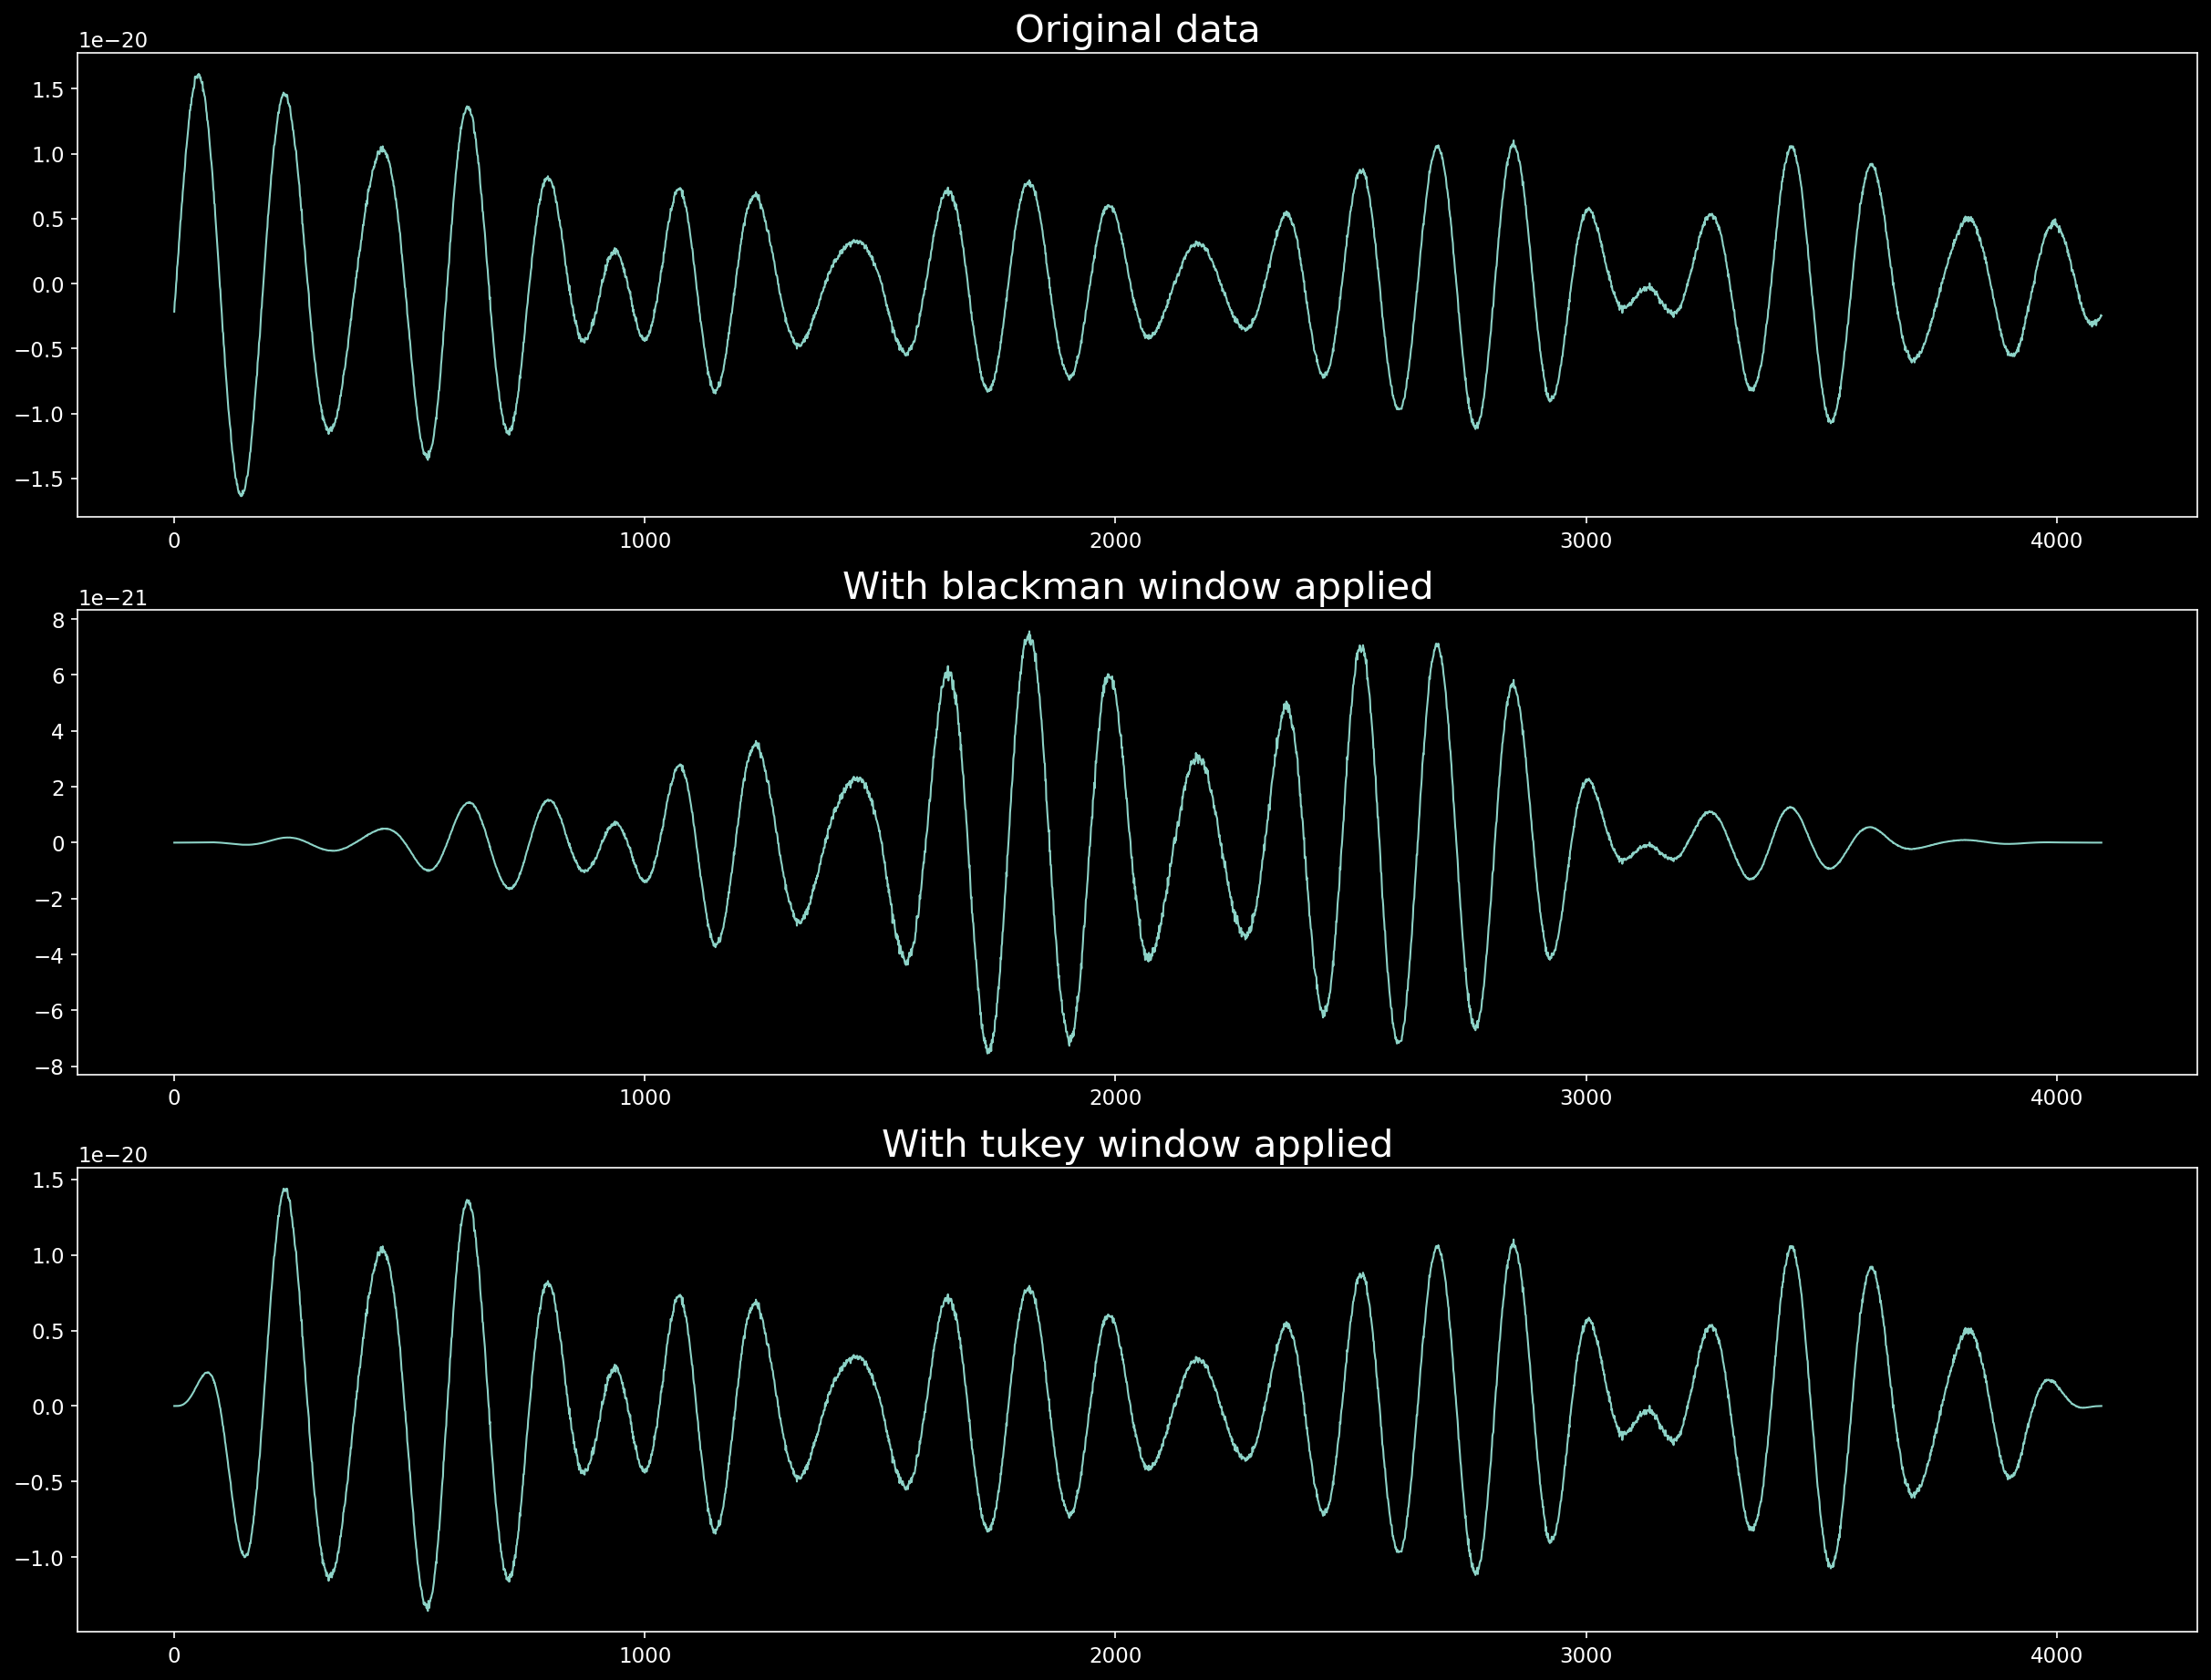

In [16]:

fig, ax = plt.subplots(3,1,figsize=(20,15))

ax[0].plot(example_strain[channel])
ax[0].set_title("Original data")

ax[1].plot(example_strain[channel]*blackman_window)
ax[1].set_title("With blackman window applied")

ax[2].plot(example_strain[channel]*tukey_window)
ax[2].set_title("With tukey window applied");

This section plots the original data and then how the data changes after applying the Blackman and Tukey window functions. By applying a window function, the shape of the original waveform is smoothed, which can help reduce spectral leakage. The window function specified here is the Blackman function and the Tukey function with an alpha of 0.125.

Afterward, this code plots the power spectral density (PSD) of the Tukey window signal on a logarithmic scale. This allows you to see the distribution of energy at different frequencies. The X-axis shows frequency in Hertz, and the Y-axis shows the PSD on a logarithmic scale. The plot is marked with a grid, and a label is added to the X-axis to indicate that it represents frequency.

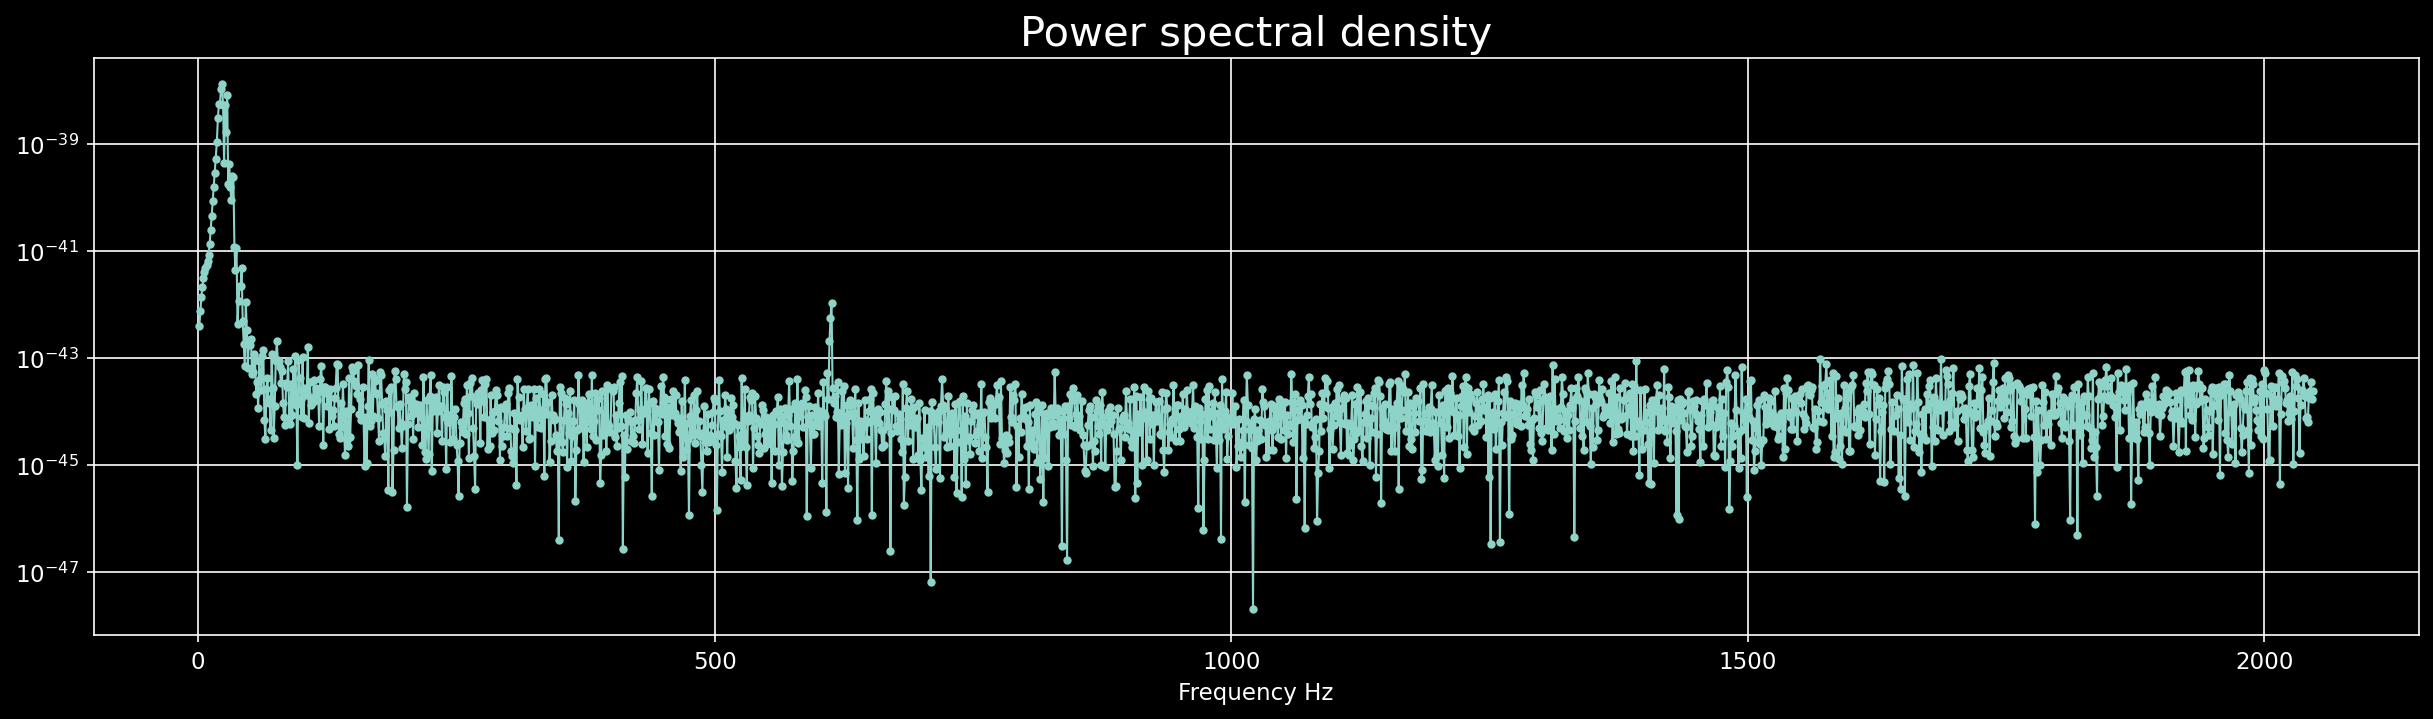

In [17]:
windowed_strain = example_strain[channel]*tukey_window
fhat = np.fft.fft(windowed_strain, samples_total)
PSD = fhat * np.conj(fhat) / samples_total
freq = 1/(dt*samples_total) * np.arange(samples_total)
L = np.arange(1, np.floor(samples_total/2), dtype="int")

plt.figure(figsize=(20,5))
plt.plot(freq[L],PSD[L], '.-')
plt.grid("on")
plt.xlabel("Frequency Hz");
plt.title("Power spectral density");
plt.yscale("log")

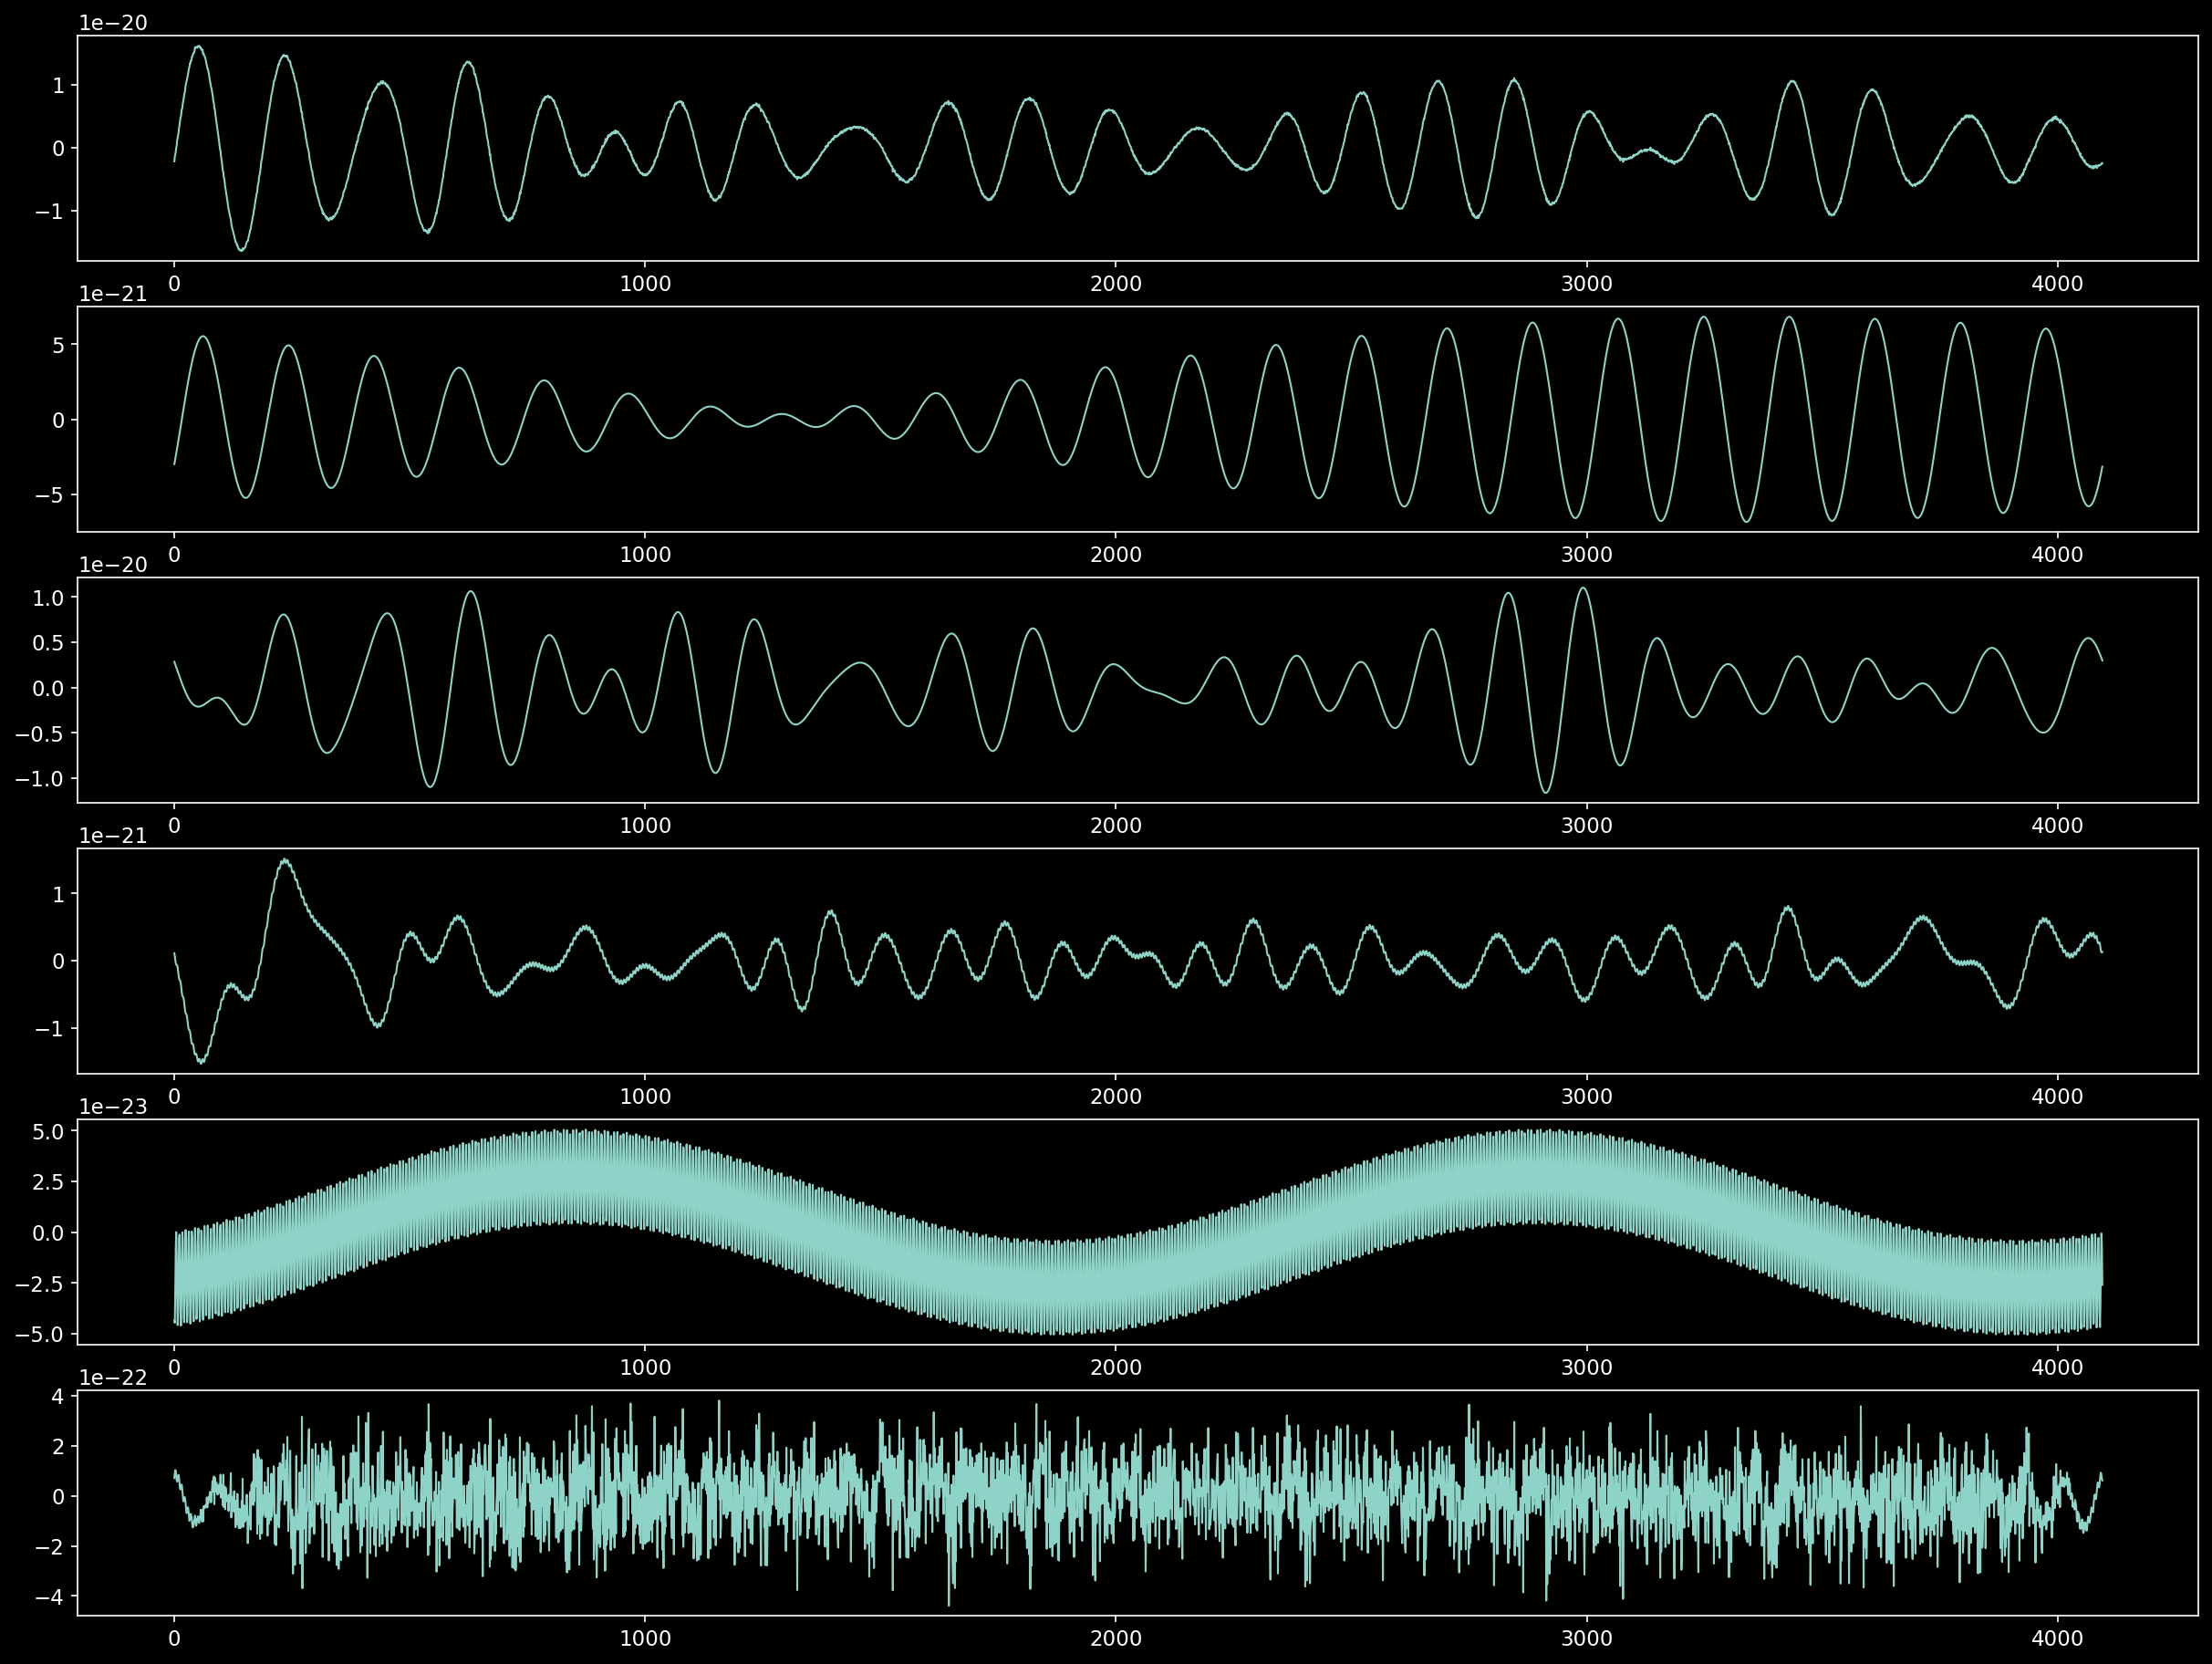

In [18]:
ig, ax = plt.subplots(6,1,figsize=(20,15))

ax[0].plot(example_strain[channel])
ax[1].plot(np.fft.ifft((PSD>1e-38)*fhat))
ax[2].plot(np.fft.ifft(((PSD>1e-40) & (PSD <= 1e-38))*fhat))
ax[3].plot(np.fft.ifft(((PSD>1e-42) & (PSD <= 1e-40))*fhat))
ax[4].plot(np.fft.ifft(((PSD>0.5e-42) & (PSD <= 1e-42))*fhat))
ax[5].plot(np.fft.ifft((PSD<=0.5e-42)*fhat))

if not show_side_effects:
    for n in range(3,6):
        ax[n].set_xlim(20,2000)

This section creates a figure with 6 subplots. Each subplot represents a different version of the signal after applying filters in the Fourier transform. In each subplot, the signal is shown after filtering those frequency components with a certain spectral power, indicated by the boolean condition applied on PSD. For example, in the second subplot, only the frequency components with a spectral power greater than 1e-40 and less than or equal to 1e-38 are represented.

After applying the filter, the original signal is obtained again with the np.fft.ifft function.

If the show_side_effects variable is set to False, then the x-axis of the last 3 subplots (from subplot 3 to subplot 5) is limited to show only values from 20 to 2000. This is probably done to focus on the part of the signal that is considered more interesting or relevant.

After applying the windowing function, a process called "whitening" is performed. The goal of this process is to smooth out the low-frequency noise that dominates the original data. This is achieved by dividing the Fourier coefficients by an estimate of the amplitude spectral density of the noise. Then, an inverse Fourier transform is performed to return to the time domain. It is mentioned that the technique uses spline interpolation, but it is suggested that this could be easily replaced by alternatives.

In [19]:
def process_data(Target_1):
    sample_rate = 2048 #Hz (1/seconds)
    time_span = 2 #seconds
    samples_total = time_span * sample_rate
    dt = 1/(samples_total) #4096 points in total
    
    channel = 0 #pick which detector you like to use
    
    fhat = np.fft.fft(Target_1[channel,:], samples_total)
    PSD = fhat * np.conj(fhat) / samples_total
    freq = 1/(dt*samples_total) * np.arange(samples_total)
    
    L = np.arange(1, np.floor(samples_total/2), dtype="int")
    hp_window = 1
    hp_tukey_alpha = 0.125
    fband = [35.0, 200.0]
    
    blackman_window = signal.blackman(int(samples_total*hp_window)) #signal.tukey(strain, alpha=1./8)
    tukey_window = signal.tukey(samples_total*hp_window, hp_tukey_alpha)
    windowed_strain = Target_1[channel]*tukey_window
    fhat = np.fft.fft(windowed_strain, samples_total)
    PSD = fhat * np.conj(fhat) / samples_total
    freq = 1/(dt*samples_total) * np.arange(samples_total)
    L = np.arange(1, np.floor(samples_total/2), dtype="int")

    def whiten(strain, samples_total, dt):
        # TODO: normalization 

        fhat = np.fft.fft(strain, samples_total)
        PSD = fhat * np.conj(fhat) / samples_total
        freq = 1/(dt*samples_total) * np.arange(samples_total)

        # scipy interp1d interpolation
        interp_psd = interp1d(freq, PSD, "nearest")

        w_fhat = fhat/np.sqrt(interp_psd(freq))
        w_strain = np.fft.ifft(w_fhat)
        return w_strain, interp_psd(freq)

    w_strain, ip = whiten(windowed_strain, samples_total, dt)

    def bandpass(strain, fband, fs):
        """Bandpasses strain data using a butterworth filter.

        Args:
            strain (ndarray): strain data to bandpass
            fband (ndarray): low and high-pass filter values to use
            fs (float): sample rate of data

        Returns:
            ndarray: array of bandpassed strain data
        """
        bb, ab = butter(4, [fband[0]*2./fs, fband[1]*2./fs], btype='band')
        normalization = np.sqrt((fband[1]-fband[0])/(fs/2))
        strain_bp = filtfilt(bb, ab, strain) / normalization
        return strain_bp

    bandpassed_strain = bandpass(w_strain, fband, samples_total)
    
    return bandpassed_strain

This code processes a data signal using a combination of techniques including windowing, whitening, and bandpass filtering.

First, some variables are initialized including the sample rate, time span, and total number of samples. Then, the code selects which detector to use and computes the Fourier transform of the data signal. The power spectral density (PSD) and frequency components are also computed.

Next, the code applies a high-pass filter to the signal using a Blackman window and a Tukey window. The filtered signal is then whitened to remove low-frequency noise by dividing the Fourier coefficients by an estimate of the amplitude spectral density of the noise. The whitened signal is then bandpass filtered between 35 and 200 Hz using a Butterworth filter.

Here's a breakdown of the individual steps:

Initialize variables: The sample rate, time span, and total number of samples are set. The code selects which detector to use.

Compute Fourier transform: The Fourier transform of the data signal is computed using the NumPy function np.fft.fft(). The power spectral density (PSD) and frequency components are also computed.

Apply high-pass filter: The code applies a high-pass filter to the signal using a Blackman window and a Tukey window. This helps to remove low-frequency noise from the signal.

Whiten the signal: The whitening process involves dividing the Fourier coefficients by an estimate of the amplitude spectral density of the noise. This helps to remove low-frequency noise from the signal.

Bandpass filter the signal: The signal is then bandpass filtered between 35 and 200 Hz using a Butterworth filter. This helps to remove high-frequency noise from the signal.

Return the filtered signal: The bandpass filtered signal is returned from the function.

Overall, this code is performing a series of signal processing steps to remove noise from a data signal and focus on a specific frequency range of interest.

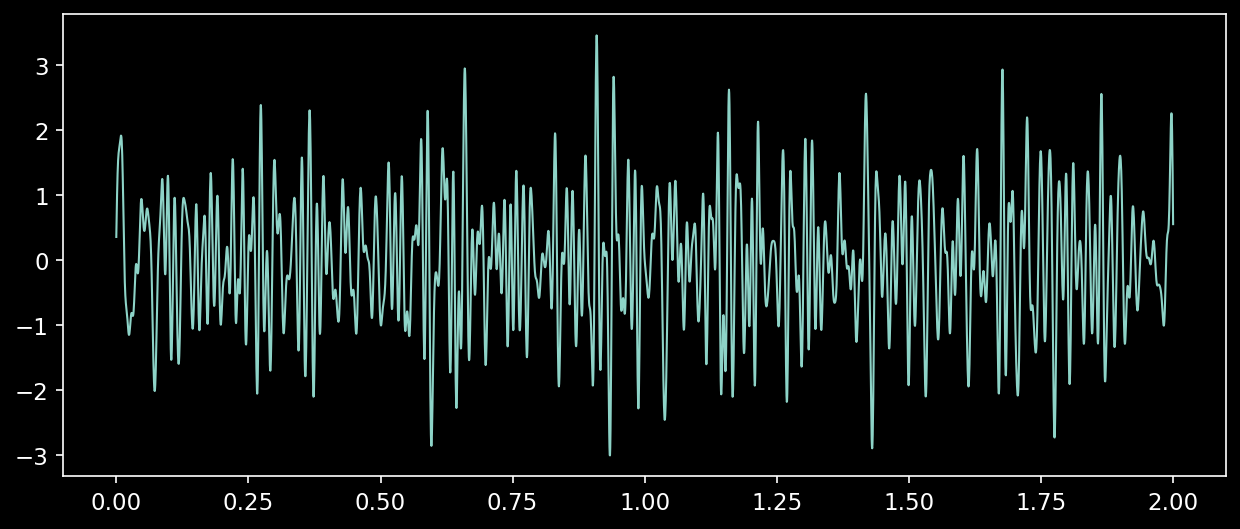

In [20]:
a = process_data(example_strain)
df = pd.DataFrame(pd.Series(a))
df["Time(s)"] = np.linspace(0, 2, num = 4096)
df.columns = ["Data", "Time(s)"]
plt.plot(df["Time(s)"],df["Data"])


# Model

In [21]:
train_labels = pd.read_csv('../input/g2net-gravitational-wave-detection/training_labels.csv')
sample_submission = pd.read_csv('../input/g2net-gravitational-wave-detection/sample_submission.csv')

<AxesSubplot:xlabel='target', ylabel='count'>

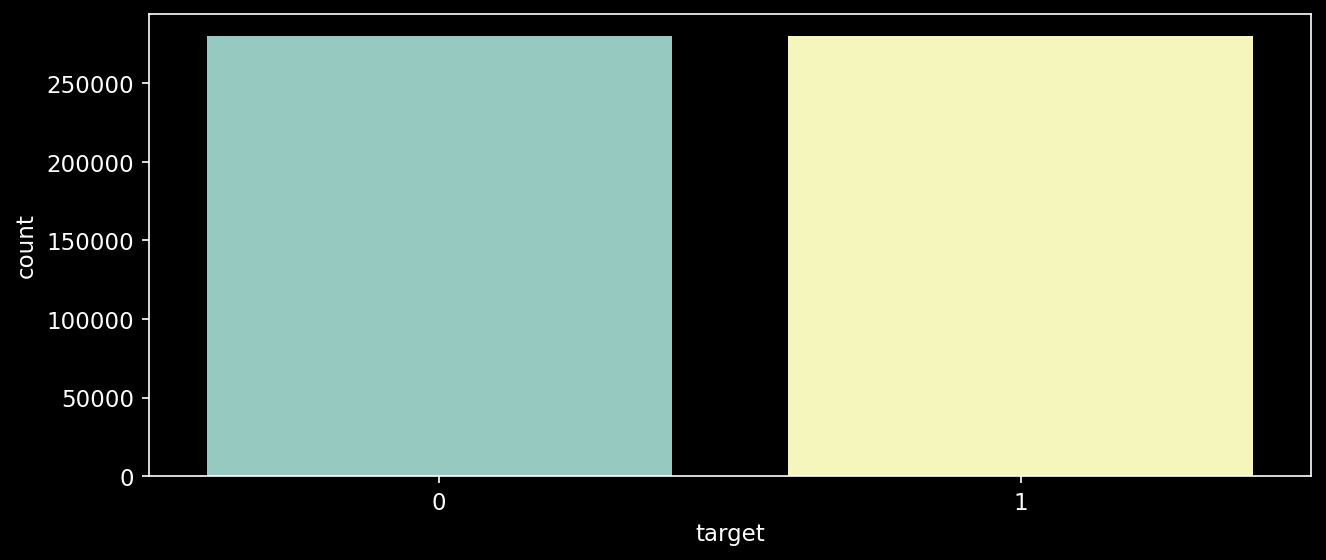

In [22]:
sns.countplot(x='target',data=train_labels)

In [23]:
class Dataset(Sequence):
    def __init__(self,idx,y=None,batch_size=256,shuffle=True):
        self.idx = idx
        self.batch_size = batch_size
        self.shuffle = shuffle
        if y is not None:
            self.is_train=True
        else:
            self.is_train=False
        self.y = y
    def __len__(self):
        return math.ceil(len(self.idx)/self.batch_size)
    def __getitem__(self,ids):
        batch_ids = self.idx[ids * self.batch_size:(ids + 1) * self.batch_size]
        if self.y is not None:
            batch_y = self.y[ids * self.batch_size: (ids + 1) * self.batch_size]
            
        list_x = np.array([increase_dimension(x,self.is_train) for x in batch_ids])
        batch_X = np.stack(list_x)
        if self.is_train:
            return batch_X, batch_y
        else:
            return batch_X
    
    def on_epoch_end(self):
        if self.shuffle and self.is_train:
            ids_y = list(zip(self.idx, self.y))
            shuffle(ids_y)
            self.idx, self.y = list(zip(*ids_y))

This code defines a custom Dataset class, which is a necessary step in preparing the data for machine learning models.

First, two CSV files are loaded using Pandas: 'training_labels.csv' and 'sample_submission.csv'. These contain the labels for the training set and the format for the submission file, respectively.

Next, the Dataset class is defined. It inherits from the Keras Sequence class and has several methods: init, len, getitem, and on_epoch_end.

In the init method, the input arguments are saved as instance variables. The idx argument is a list of file IDs that correspond to the training data. The y argument is a list of labels for the training data. If y is not provided, it means that the Dataset is being used for inference rather than training.

The len method returns the number of batches in the dataset, which is calculated by dividing the total number of samples (the length of idx) by the batch size and rounding up.

The getitem method is responsible for generating a batch of data. The input argument ids is a list of batch indices. For each batch index, a batch of file IDs is selected from idx. If y is not None (which means that the Dataset is being used for training), the corresponding labels are also selected.

Then, a list of input data is created by calling the increase_dimension function on each file ID in the batch. The increase_dimension function is not shown in the provided code, but it presumably takes a file ID and returns the corresponding data with some additional dimensions added.

The list of input data is then stacked into a batch of shape (batch_size, ...) using numpy's stack function. If y is not None, the batch of input data and the batch of labels are returned. Otherwise, only the batch of input data is returned.

The on_epoch_end method is called at the end of each epoch during training. If shuffle is True and y is not None, the file IDs and labels are zipped together, shuffled, and then unzipped back into separate lists.

Overall, the Dataset class provides a way to efficiently load and manipulate the training data for machine learning models.

In [24]:
train_idx =  train_labels['id'].values
y = train_labels['target'].values
test_idx = sample_submission['id'].values

x_train,x_valid,y_train,y_valid = train_test_split(train_idx,y,test_size=0.05,random_state=42,stratify=y)

train_dataset = Dataset(x_train,y_train)
valid_dataset = Dataset(x_valid,y_valid)
test_dataset = Dataset(test_idx)

In [25]:
import keras.layers as L # For building layers in neural networks

In [26]:
entrada = L.InputLayer(input_shape=(69, 193, 1))
conv = L.Conv2D(3, 3, activation='relu', padding='same')
efn = efn.EfficientNetB0(include_top=False, input_shape=(), weights='imagenet')
pool = L.GlobalAveragePooling2D()
densa1 = L.Dense(32, activation='relu')
densa2 = L.Dense(1, activation='sigmoid')
modelo = tf.keras.Sequential([    entrada,    conv,    efn,    pool,    densa1,    densa2])
modelo.summary()
modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=[keras.metrics.AUC()])


16804768/16804768 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 193, 3)        30        
                                                                 
 efficientnet-b0 (Functional  (None, None, None, 1280)  4049564  
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 32)                40992     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                         

InputLayer(input_shape=(69,193,1)): La capa de entrada del modelo, que espera una entrada de imágenes en escala de grises con dimensiones 69x193 y un solo canal (1).

Conv2D(3,3,activation='relu',padding='same'): La primera capa convolucional del modelo con 3 filtros de tamaño 3x3, función de activación ReLU y con padding para mantener el mismo tamaño de la imagen de entrada.

efn.EfficientNetB0(include_top=False,input_shape=(),weights='imagenet'): La capa intermedia del modelo, que utiliza la red neuronal EfficientNetB0 pre-entrenada en la base de datos de ImageNet. include_top=False indica que no se incluirá la capa final densa de 1000 clases de ImageNet, ya que se utilizará una capa densa personalizada para la clasificación binaria de la detección de ondas gravitatorias. weights='imagenet' indica que se utilizarán los pesos pre-entrenados de ImageNet en la red neuronal EfficientNetB0.

GlobalAveragePooling2D(): Una capa de agrupamiento global que calcula la media de cada mapa de características de la última capa convolucional. Esto reduce el tamaño de la salida de la capa intermedia y proporciona una representación promedio de la imagen completa en lugar de las características locales.

Dense(32,activation='relu'): Una capa densa completamente conectada con 32 neuronas y función de activación ReLU.

Dense(1, activation='sigmoid'): La capa de salida del modelo con una neurona y función de activación sigmoide, que produce una salida binaria para la detección de ondas gravitatorias.

model.summary() muestra un resumen del modelo, incluyendo el número de parámetros entrenables y no entrenables.

model.compile() compila el modelo con el optimizador Adam con una tasa de aprendizaje de 0.001, la función de pérdida de entropía cruzada binaria y la métrica de evaluación de AUC (área bajo la curva ROC).

In [27]:
modelo.fit(train_dataset,epochs=1,validation_data=valid_dataset)

2079/2079 [==============================] - 38063s 18s/step - loss: 0.4620 - auc: 0.8398 - val_loss: 0.8414 - val_auc: 0.8497


In [28]:
preds = modelo.predict(test_dataset)
preds = preds.reshape(-1)
submission = pd.DataFrame({'id':sample_submission['id'],'target':preds})
submission.to_csv('submission.csv',index=False)

883/883 [==============================] - 4891s 6s/step
